<a href="https://colab.research.google.com/github/asmaradhiah/PBI/blob/main/in-class-assignments/ica04/Data_Preprocessing_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< [Data Mining](../ica03/Data_Mining.ipynb) | Contents (TODO) | [Supervised Learning](../ica05/Supervised_Learning.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica04/Data_Preprocessing_and_Visualization.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Data Preprocessing and Visualization

In today's exercise, we are going to talk about how to preprocess data into a form that is useful for you(r machine learning model). We will also talk about how to visualize the data set so that you get a good grasp of how your data look like, which is tremendously important, even more than the actual machine learning part itself, but often overlooked. In this example, we are going to take a look at [Student Alcohol Consumption data set](https://www.kaggle.com/uciml/student-alcohol-consumption) available in Kaggle. For your convenience, however, you don't need to download the data set, but I have already included the data set with this example. Feel free to go ahead and look up `data` folder within the same directory where this notebook exists (or [here](https://github.com/stephenbaek/bigdata/tree/master/in-class-assignments/ica04/data) if you're accessing this notebook from Colab).

In [1]:
import pandas as pd

# some CSV files are not separated with comma, but weirdly with some other symbols, such as semicolon ';' in this case...
df = pd.read_csv('https://github.com/stephenbaek/bigdata/raw/master/in-class-assignments/ica04/data/student-mat.csv', sep=';')

# In case you have too many columns, pandas automatically skips to display some of the columns in the middle.
# We will disable this option for this exercise.
pd.set_option('display.max_columns', None)

df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## 1. Preprocessing

### 1.1. Sampling

When you have a data set with millions of entries, the shear volume of data can be overwhelming and you might be hindered to see inside of the data set and develop some insights. To this end, it is always a good practice to sample the data set and create a smaller data set with handful amount of subsamples.

In Pandas, subsampling a data set can be as simple as `df.sample()` as shown below. The function draws random subsamples from the DataFrame.

In [2]:
sampled = df.sample(n=10)
sampled

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
349,MS,M,18,R,GT3,T,3,2,other,other,course,mother,2,1,1,no,yes,no,no,no,yes,yes,no,2,5,5,5,5,5,10,11,13,13
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0
14,GP,M,15,U,GT3,A,2,2,other,other,home,other,1,3,0,no,yes,no,no,yes,yes,yes,yes,4,5,2,1,1,3,0,14,16,16
272,GP,F,18,U,LE3,T,1,1,other,other,home,mother,2,2,0,no,yes,yes,no,no,yes,no,no,4,4,3,1,1,3,2,11,11,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
57,GP,M,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,no,no,3,2,2,1,1,5,4,14,15,15
241,GP,M,17,R,LE3,A,4,4,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,2,3,4,2,10,11,12
12,GP,M,15,U,LE3,T,4,4,health,services,course,father,1,1,0,no,yes,yes,yes,yes,yes,yes,no,4,3,3,1,3,5,2,14,14,14
42,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18
364,MS,F,17,R,GT3,T,1,2,other,services,course,father,2,2,0,no,no,no,no,no,yes,no,no,3,2,2,1,2,3,0,12,11,12


Or, alternatively, you can use the argument `frac` to define the fraction (percentage) of the original data you would like to sample. For example, to sample 2% of the original data points, you can call something like this:

In [3]:
sampled2 = df.sample(frac=0.02)
sampled2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
21,GP,M,15,U,GT3,T,4,4,health,health,other,father,1,1,0,no,yes,yes,no,yes,yes,yes,no,5,4,2,1,1,5,0,12,15,15
319,GP,F,18,U,GT3,T,4,4,teacher,other,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,3,3,5,2,11,11,11
92,GP,F,16,U,LE3,T,3,1,other,other,home,father,1,2,0,yes,yes,no,no,yes,yes,no,no,3,3,3,2,3,2,4,7,6,6
232,GP,M,17,U,GT3,T,4,4,teacher,teacher,reputation,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,yes,4,5,5,1,3,2,14,11,9,9
117,GP,M,16,U,GT3,T,3,3,other,services,home,father,2,1,0,no,no,no,yes,yes,yes,yes,no,5,4,2,1,1,5,0,13,14,13
80,GP,M,15,U,GT3,T,2,3,other,services,course,father,1,1,0,yes,yes,yes,yes,no,yes,yes,yes,3,2,2,1,3,3,2,10,12,12
253,GP,M,16,R,GT3,T,2,1,other,other,course,mother,2,1,0,no,no,no,yes,no,yes,no,no,3,3,2,1,3,3,0,8,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0


Note that the options `n` and `frac` CANNOT be used together.

### 1.2. Mapping

One thing you perhaps might have noticed is that some of the columns are in non-numeric format. For exampe, `sex` is in either `F` or `M`, `famsize` (family size) is either `GT3` or `LE3`, `guardian` is either `mother`, `father`, or `other`, so on and so forth.

In [4]:
print(df.sex.unique())
print(df.famsize.unique())
print(df.guardian.unique())

['F' 'M']
['GT3' 'LE3']
['mother' 'father' 'other']


This can actually be problematic later, because, eventually your machine learning model (which is basically some "kinda sorta" math formula) would expect to see numeric values, not strings or texts. Thus, what we want to do over here is to convert them into numeric values. For example, we could use a binary variable to indicate if the student is female (1) or not (0). We could use the same strategy for the family size by denoting `1` for a large family (`GT3`) and `0` for a small family (`LE3`).

In [5]:
df = df.replace({                     # Don't run this line twice
    'sex': {'F': 1, 'M': 0},          #
    'famsize': {'GT3': 1, 'LE3': 0}   # Label Encoding
                })                    #
df.head(5)

/tmp/ipython-input-3734887827.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({                     # Don't run this line twice


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,1,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,0,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,1,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,1,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In the above, notice the use and the structuring of the curly braces. That is, `DataFrame.replace()` function expects the "mapping rules" to be defined as dictionaries. The outer curly braces simply list the columns that are being mapped, while the inner curly braces specifies the conversion rule. Please pause and ponder to make sure the syntax makes sense to you.

Here, you might wonder, however, how to numerize the `guardian` column. For `sex` and `famsize` there was a quite intuitive and trivial way of assigning binary digits. However, for the `guardian` column, there are now three different types of vaues in concern, namely `mother`, `father`, and `other`, which is not binary anymore.

One may argue that we can still solve this issue by assigning some integer numbers. For instanace, `mother = 1`, `father = 2`, and `other = 3`, or some similar sort. However, you have to be very careful when you assign those numbers as the numbers have "magnitude" and the magnitude actually means a lot in most of the machine learning models. For example, with the above example, your machine learning model would perceive having other guardian than mother or father is more "significant", which might bias your model. Furthermore, quantitativey, the "significance" of having other guardian is 3x times larger than having mother as guardian and 1.5x higher than having father as guardian, which doesn't even make sense at all. Situations like this is called *categorical variables*, where ordering between categories doesn't really make any sense.

For categorical variables, we convert them into something called *dummy variables* or *indicator variables* (some people recently started to call them *one-hot-encoding*, which in my view is an unnecessary reinvention of a term). Construction of dummy variables is actually quite simple. First, count how many total categories your variable can have. In our case, `guardian` can have total three different categories. Second, construct a "zero-vector" of the dimension equal to the total number of categories. Again, `guardian` variable should have `[0, 0, 0]`. Lastly, flag an element with `1` depending on the category. For example, if a student has `mother` as `guardian`, the vector value should now turn into `[1, 0, 0]`, for `father`, `[0, 1, 0]`, and for `other`, `[0, 0, 1]`. In this way, you can effectively convert categorical variables into numeric values without posing any bias.

(*Sometimes, people use one less elements in the dummy variable than the total number of categories, to remove the redundancy. In this case, the cateogry that is not explicitly encoded is called the "reference". For example, we can use `mother` as reference and set `[1, 0]` for `father` and `[0, 1]` for `other`.)

In pandas, converting to dummy variables is as simple as `DataFrame.get_dummies`.

In [6]:
df = pd.get_dummies(df, columns=["guardian"]) # One Hot Encoding, can actually list multiple columns if necessary
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,False,True,False
1,GP,1,17,U,1,T,1,1,at_home,other,course,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,True,False,False
2,GP,1,15,U,0,T,1,1,at_home,other,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,False,True,False
3,GP,1,15,U,1,T,4,2,health,services,home,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,False,True,False
4,GP,1,16,U,1,T,3,3,other,other,home,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,True,False,False


#### Discussion (Group Assignment)

- List all the other columns that needs to be converted to numeric values
- For each of the values you listed above, what are the binary variables and what are the categorical variables?
- Write a code below to map the given data set to a numeric table.


In [7]:
df.select_dtypes(include='object')

,school,address,Pstatus,Mjob,Fjob,reason,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,U,A,at_home,teacher,course,yes,no,no,no,yes,yes,no,no
1,GP,U,T,at_home,other,course,no,yes,no,no,no,yes,yes,no
2,GP,U,T,at_home,other,other,yes,no,yes,no,yes,yes,yes,no
3,GP,U,T,health,services,home,no,yes,yes,yes,yes,yes,yes,yes
4,GP,U,T,other,other,home,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,U,A,services,services,course,no,yes,yes,no,yes,yes,no,no
391,MS,U,T,services,services,course,no,no,no,no,no,yes,yes,no
392,MS,R,T,other,other,course,no,no,no,no,no,yes,no,no
393,MS,R,T,services,other,course,no,no,no,no,no,yes,yes,no


In [8]:
print("Columns that need to be converted to numeric values:")
for col in df.select_dtypes(include='object').columns:
    print(f"- {col}: {df[col].unique()}")

Columns that need to be converted to numeric values:
- school: ['GP' 'MS']
- address: ['U' 'R']
- Pstatus: ['A' 'T']
- Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
- Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
- reason: ['course' 'other' 'home' 'reputation']
- schoolsup: ['yes' 'no']
- famsup: ['no' 'yes']
- paid: ['no' 'yes']
- activities: ['no' 'yes']
- nursery: ['yes' 'no']
- higher: ['yes' 'no']
- internet: ['no' 'yes']
- romantic: ['no' 'yes']


In [9]:
# Binary variables (mapping to 0/1)
df = df.replace({
    'school': {'GP': 1, 'MS': 0},
    'address': {'U': 1, 'R': 0},
    'Pstatus': {'A': 1, 'T': 0},
    'schoolsup': {'yes': 1, 'no': 0},
    'famsup': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0},
    'activities': {'yes': 1, 'no': 0},
    'nursery': {'yes': 1, 'no': 0},
    'higher': {'yes': 1, 'no': 0},
    'internet': {'yes': 1, 'no': 0},
    'romantic': {'yes': 1, 'no': 0}
})

# Categorical variables (one-hot encoding)
df = pd.get_dummies(df, columns=[
    'Mjob', 'Fjob', 'reason'
])

df.head()


/tmp/ipython-input-3244159050.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,1,1,1,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False
1,1,1,17,1,1,0,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
2,1,1,15,1,0,0,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
3,1,1,15,1,1,0,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
4,1,1,16,1,1,0,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


### 1.3. Discretization
Sometimes, your data is too granular that you might be hindered from seeing the big trend. Also, when the data is noisy, high-resolution measurement of a quantity is not always a desirable thing. No matter what the reason is, one useful trick to analyze a large data is to discretize (quantize) the values. For example, let us take a look at the absences data.

<Axes: ylabel='Frequency'>

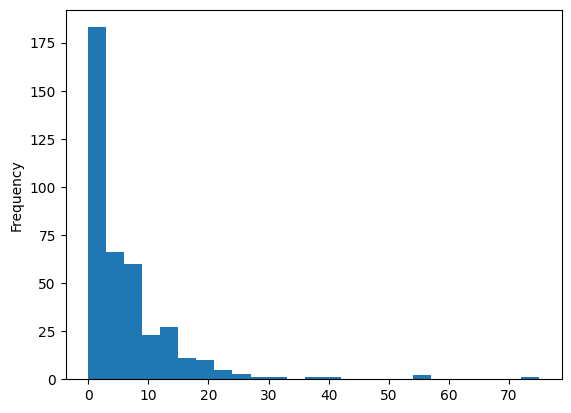

In [10]:
df.absences.plot(kind='hist', bins=25)

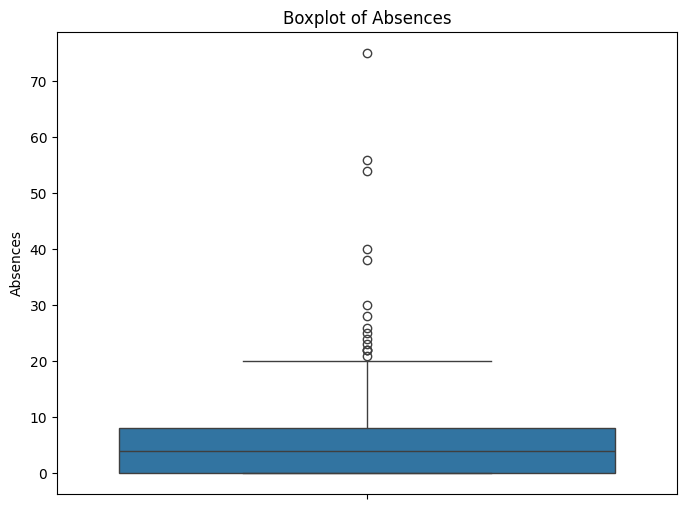

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['absences'])
plt.title('Boxplot of Absences')
plt.ylabel('Absences')
plt.show()

In [12]:
# Other visualizations that can be done include dimensionality reduction techniques like PCA, MDS, and t-SNE.
# These are covered in the subsequent sections of this notebook (2.1 Dimension Reduction).
# You can apply these methods to visualize different aspects of your dataset, for example:
# - Visualize the data points colored by 'age', 'Medu' (mother's education), or 'studytime' to see if there are clusters or patterns.
# - Compare the insights gained from PCA, MDS, and t-SNE for the same variables.
# - Consider creating scatter plots of two individual columns (e.g., 'G_agg' vs 'studytime') before applying dimension reduction.

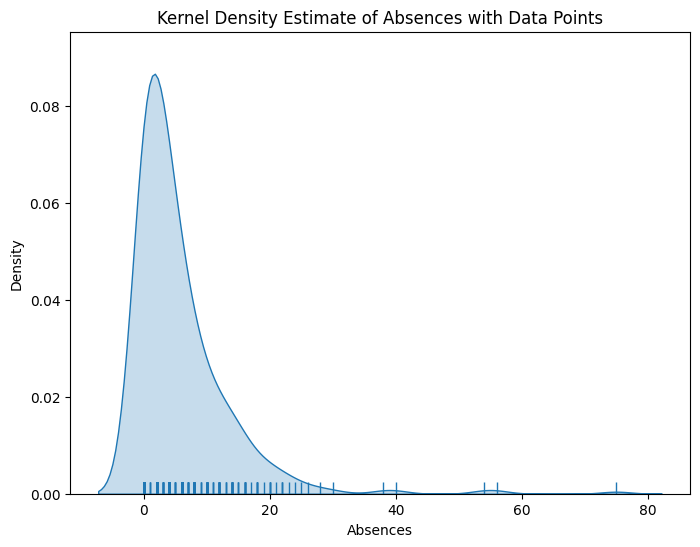

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(df['absences'], fill=True)  # KDE plot without rug
sns.rugplot(df['absences'], ax=plt.gca()) # Add rugplot separately on the same axes
plt.title('Kernel Density Estimate of Absences with Data Points')
plt.xlabel('Absences')
plt.ylabel('Density')
plt.show()

In [14]:
df.absences.describe() #STD and means helps to find Coefficient of Variation = std/mb = =1.4

,absences
count,395.000000
mean,5.708861
std,8.003096
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,75.000000


First, we can notice that many of the students have zero absences. Then, another big majority of students have absence values less than or equal to 5. Some students are between 5 and 15, and there are also some extreme cases where the total number absences is way beyond 15. From this observation, one potential discretization of data is as follows:

In [15]:
absences_discretized = pd.cut(df.absences, [0, 1, 5, 15, float("inf")], labels=[0, 1, 2, 3], right=False)
print(absences_discretized)

0      2
1      1
2      2
3      1
4      1
      ..
390    2
391    1
392    1
393    0
394    2
Name: absences, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


Note that `pd.cut` accepts a Pandas `Series` object and outputs a discretized `Series` object. The second argument (input) to `pd.cut` is the list of intervals or the bins. In our case, we would like to have [0, 1), [1, 5), [5, 15), and [15, inf) as our bins, representing 'no absence at all', 'only a few absences', 'some absences', and 'many absences', respectively, so the bins become `[0, 1, 5, 15, float("inf")]`. Notice the weird way of denoting the infinity in Python. Also, `right=False` at the end of the `pd.cut` arguments indicates that the intervals (bins) will not include the right limits. If it is turned `True`, which is the default setting, the intervals will become (0, 1], (1, 5], (5, 15], and (15, inf], instead (notice the parentheses and square brackets).

Meanwhile, in `pd.cut`, we can specify the label for each bin. In this example, we use `0, 1, 2, 3` as labels for those bins, respectively, the numbers indicating the "severity of absences". Technically, the bins are considered as categorical variables. However, in our case, the "categories" actually have some ordering (i.e. there exists the notion of magnitude), as opposed to the examples above. In this case, the variables are called *ordinal variables*.

Given this, we replace the `absences` column with the new discretized column:

In [16]:
#clean up and integration
df['absences_discretized'] = absences_discretized.astype('int')   # add the new discretized column
df = df.drop(columns='absences')    # the original 'absences' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized
0,1,1,18,1,1,1,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,5,6,6,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,2
1,1,1,17,1,1,0,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,5,5,6,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1
2,1,1,15,1,0,0,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,7,8,10,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,2
3,1,1,15,1,1,0,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,15,14,15,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,1
4,1,1,16,1,1,0,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,6,10,10,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,1


#### Discussion (Group Assignment)

- Other than `absences`, what else can be discretized?
- Can you find two or more columns that can be merged and discretized together? Please justify.

<Axes: ylabel='Frequency'>

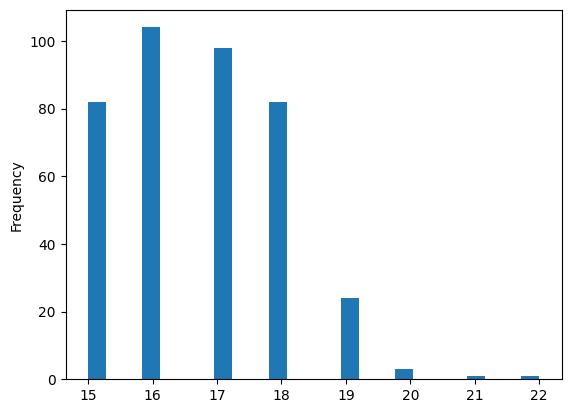

In [17]:
df.age.plot(kind='hist', bins=25)

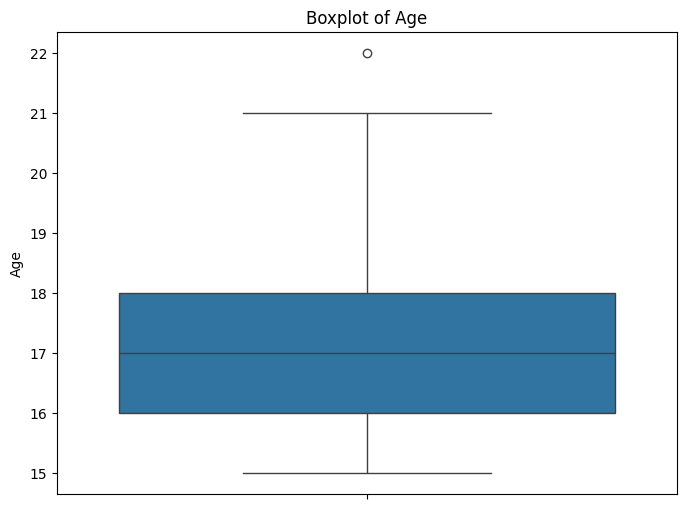

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [19]:
df.age.describe() #STD and means helps to find Coefficient of Variation = std/mb = 0.7 or 70%

,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


Discussion Answer:

*   Other than absences, other variables that can be discritized are age (age categories), Dalc, Walc, and G_agg (performance level).
*   Dalc and Walc can be merged and discritized together. This is because both variables represent total alcohol consumption, which can be discretized into a meaningful level.



In [20]:
# Define the bins based on data distribution (15 to 22)
# Bins are (14, 17], (17, 20], (20, 22]
#bins = [14, 17, 20, 22]
#labels = [0,1,2]

# Create the new discretized column
#df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Remove the original column as requested
#df.drop(columns=['age'], inplace=True)

# Verify the change
#print(df.head())

In [21]:
# 1. Sum Dalc and Walc to get total_alcohol_consumption (Range: 2 - 10)
#df['total_alcohol_consumption'] = df['Dalc'] + df['Walc']

# 2. Define bins and labels for discretization
# Low: 2-3, Moderate: 4-6, High: 7-10
#bins = [1, 3, 6, 10]
#labels = [0,1,2]

# 3. Create the discretized column
#df['alcohol_level'] = pd.cut(df['total_alcohol_consumption'], bins=bins, labels=labels)

# 4. Drop the original columns and the intermediate sum
#df.drop(columns=['Dalc', 'total_alcohol_consumption'], inplace=True)

# 5. Display the result
#print(df.head())

### 1.4. Aggregation

One of the important outcome metrics in the table are the grades (`G1`, `G2`, and `G3`). In the data set, the student performance was tracked over a period of time, such that `G1`, `G2`, and `G3` capture the change of student performance over time. However, in some cases, this might just create a confusion and you may just want to merge them into a single value for some reason. In such cases, we can *aggregate* the columns by averaging them.

Note the term *data aggregation* is often used for a lot more chaotic size of the values than just three in our case. But this example is intended to get you a feel for how data aggregation is done in Pandas. Hence, we won't bother to make the example more realistic. This being said, let us simply try to aggregate the three columns by taking the average of them.

In [22]:
G_agg = df[ ['G1', 'G2', 'G3'] ].agg('mean', axis='columns')
print(G_agg)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64


In [25]:
df['G_agg'] = G_agg #create new column called G_agg
df = df.drop(columns=['G1', 'G2', 'G3']) #remove the existing
df.head(5)

KeyError: "['G1', 'G2', 'G3'] not found in axis"

You can also think of a slightly different scenario for aggregation, where instead of aggregating the columns, you would like to aggregate the rows by grouping them according to some criteria. For example, let's take a look at the weekend alcohol consumption column (`Walc`). We can aggregate the rows based on the weekend alcohol consumption by calling:

In [24]:
df.groupby('Walc').mean()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,G_agg
Walc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.933775,0.622517,16.450331,0.834437,0.761589,0.132450,2.821192,2.536424,1.377483,2.284768,0.251656,0.192053,0.655629,0.390728,0.569536,0.834437,0.953642,0.814570,0.337748,4.059603,3.158940,2.735099,1.006623,3.443709,0.205298,0.701987,0.092715,0.152318,0.079470,0.364238,0.264901,0.139073,0.072848,0.072848,0.523179,0.231788,0.099338,0.370861,0.278146,0.066225,0.284768,1.000000,10.988962
2,0.858824,0.600000,16.847059,0.752941,0.729412,0.070588,2.729412,2.552941,1.458824,1.976471,0.305882,0.047059,0.611765,0.505882,0.435294,0.788235,0.976471,0.858824,0.341176,3.917647,2.964706,2.811765,1.270588,3.576471,0.258824,0.670588,0.070588,0.141176,0.058824,0.364706,0.258824,0.176471,0.070588,0.035294,0.505882,0.294118,0.094118,0.376471,0.270588,0.070588,0.282353,1.070588,10.654902
3,0.800000,0.562500,16.937500,0.737500,0.662500,0.037500,2.637500,2.400000,1.387500,1.987500,0.337500,0.125000,0.625000,0.537500,0.462500,0.787500,0.962500,0.837500,0.350000,3.912500,3.400000,3.300000,1.600000,3.425000,0.225000,0.662500,0.112500,0.137500,0.125000,0.362500,0.262500,0.112500,0.037500,0.000000,0.612500,0.312500,0.037500,0.300000,0.262500,0.125000,0.312500,1.375000,10.858333
4,0.882353,0.274510,16.607843,0.764706,0.647059,0.156863,2.862745,2.705882,1.490196,1.647059,0.392157,0.098039,0.490196,0.470588,0.490196,0.784314,0.941176,0.862745,0.254902,3.823529,3.509804,3.764706,2.039216,3.882353,0.254902,0.725490,0.019608,0.137255,0.117647,0.333333,0.235294,0.176471,0.000000,0.058824,0.627451,0.294118,0.019608,0.411765,0.294118,0.117647,0.176471,1.450980,9.810458
5,0.928571,0.142857,17.035714,0.678571,0.642857,0.142857,2.535714,2.357143,1.892857,1.714286,0.750000,0.107143,0.571429,0.428571,0.571429,0.642857,0.821429,0.785714,0.392857,3.714286,3.500000,4.285714,3.321429,3.857143,0.214286,0.714286,0.071429,0.214286,0.035714,0.321429,0.285714,0.142857,0.000000,0.035714,0.500000,0.392857,0.071429,0.428571,0.285714,0.142857,0.142857,1.464286,10.154762


IF you want to break down each group little further, you can append column names:

In [26]:
df.groupby(['Walc', 'sex', 'age']).mean()

school   address   famsize   Pstatus      Medu      Fedu  \
Walc sex age                                                               
1    0   15   1.000000  0.840000  0.720000  0.160000  3.280000  2.920000   
         16   1.000000  0.888889  0.777778  0.111111  2.888889  2.500000   
         17   0.800000  0.800000  1.000000  0.000000  2.400000  2.400000   
         18   1.000000  0.500000  0.500000  0.250000  3.500000  2.750000   
         19   1.000000  1.000000  0.750000  0.250000  3.500000  3.000000   
         20   1.000000  1.000000  1.000000  1.000000  3.000000  2.000000   
     1   15   1.000000  0.809524  0.809524  0.190476  2.952381  2.761905   
         16   1.000000  0.916667  0.875000  0.125000  2.750000  2.500000   
         17   0.900000  0.800000  0.750000  0.050000  2.500000  2.400000   
         18   0.782609  0.782609  0.608696  0.130435  2.565217  2.260870   
         19   0.800000  0.800000  0.800000  0.000000  1.600000  1.600000   
         20   0.000000  1.000000  1.000000  0.000000  4.000000  2.000000   
2    0   15   1.000000  1.000000  1.000000  0.000000  2.857143  2.857143   
         16   1.000000  0.888889  0.666667  0.000000  2.777778  2.444444   
         17   1.000000  0.714286  0.571429  0.000000  2.142857  2.000000   
         18   0.777778  0.777778  0.555556  0.000000  3.222222  2.888889   
         19   1.000000  0.500000  1.000000  0.000000  2.000000  2.500000   
     1   15   1.000000  0.800000  1.000000  0.000000  2.000000  2.400000   
         16   1.000000  1.000000  0.571429  0.071429  3.071429  2.857143   
         17   0.750000  0.562500  0.750000  0.250000  2.750000  2.375000   
         18   0.545455  0.545455  0.909091  0.000000  2.727273  2.636364   
         19   0.800000  0.600000  0.600000  0.200000  2.400000  2.200000   
3    0   15   1.000000  1.000000  0.500000  0.000000  3.000000  3.000000   
         16   1.000000  0.857143  0.571429  0.000000  3.000000  2.142857   
         17   0.777778  0.666667  0.555556  0.111111  3.111111  3.222222   
         18   0.500000  0.500000  0.500000  0.000000  2.500000  2.200000   
         19   0.000000  0.250000  0.750000  0.000000  1.000000  1.000000   
         21   0.000000  0.000000  1.000000  0.000000  1.000000  1.000000   
     1   15   1.000000  0.666667  0.666667  0.000000  2.888889  2.333333   
         16   1.000000  0.875000  0.625000  0.000000  2.375000  2.250000   
         17   0.888889  0.833333  0.722222  0.111111  2.611111  2.444444   
         18   0.666667  0.833333  1.000000  0.000000  3.000000  2.833333   
         19   1.000000  1.000000  0.750000  0.000000  2.500000  2.250000   
4    0   15   1.000000  0.800000  0.600000  0.200000  3.800000  2.800000   
         16   1.000000  0.800000  0.800000  0.000000  2.600000  2.800000   
         17   0.916667  0.750000  0.583333  0.166667  2.833333  2.250000   
         18   0.700000  0.700000  0.600000  0.100000  2.900000  2.800000   
     1   15   1.000000  0.666667  0.333333  0.333333  2.666667  2.333333   
         16   1.000000  1.000000  0.833333  0.333333  2.666667  2.666667   
         17   1.000000  1.000000  1.000000  0.000000  3.000000  3.333333   
         18   0.000000  0.000000  0.000000  0.500000  2.500000  4.000000   
5    0   15   1.000000  0.666667  0.666667  0.666667  3.333333  3.000000   
         16   1.000000  0.666667  0.500000  0.166667  3.500000  3.333333   
         17   1.000000  0.571429  0.571429  0.000000  2.000000  2.285714   
         18   0.833333  0.833333  0.666667  0.000000  2.000000  1.500000   
         20   0.000000  1.000000  0.000000  1.000000  2.000000  2.000000   
         22   1.000000  1.000000  1.000000  0.000000  3.000000  1.000000   
     1   16   1.000000  1.000000  1.000000  0.000000  2.500000  2.000000   
         17   1.000000  0.000000  1.000000  0.000000  3.000000  4.000000   
         18   1.000000  0.000000  1.000000  0.000000  1.000000  1.000000   

              traveltime  studytime  failures  schoolsup    fam

### CAUTION: Before to move on to the next section, make sure you don't have `string` variables any more.
All of the values in the table has to be numeric, in order to run the examples in the next section. If you have done the above assignments, you would be okay by now. However, in case you still have `string` variables in your table but just want to move on for now, you can drop those cells like in below:

In [27]:
df = df.drop(columns=['school', 'address', 'Pstatus',
                      'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

## 2. Visualization

When you work on a data analysis problem, it is incredibly important to visualize, see, and comprehend data, with your human perception and cognition, and with common sense. It is important not to try being a hero by impatiently apply some fancy ML algorithms right away. Visualizing data at the early stage sounds like an unnecessary, perhaps tedious job to do, but in fact, you will learn a lot from doing it (properly) and the insight you develop from that will help you coming up with a better model and ultimately a more fruitful conclusion.

Although many of the topics in this section are to be covered later in the semester, we will take a look at some simple approaches, including PCA, MDS, and t-SNE.

### 2.1. Dimension Reduction

The problem of visualization essentially equates to the problem of dimensionality reduction. Human perception is, in fact, quite limited to reletavely lower dimensional spaces. Two dimension (i.e. a plane) is apparently the dimensionality that we feel most comfortable about. We might add a few more dimensions by adding the "z-axis" or by adding colors, glyphs, different sized datum, etc., but the visualization literature usually suggest to keep things lower than 6-dimension, as that's the limit that people feel cognitively comfortable.

This being said, the problem here is then how to plot data, which oftentimes are much higher than 6-D, in a much lower dimensional space, like the two dimensional plane. Assuming your data is linearly distributed (which is quite likely in many scenarios), you may find a method called *Principal Component Analysis* very useful. Without talking too much about mathematical details, PCA attempts to find so-called *principal components* representing the direction of greatest variance:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1200px-GaussianScatterPCA.svg.png" width=400 />

We plan to dig deeper into the mathematical details of PCA later in this semester. We will talk about eigenvalues, covariances, and a few other topics from linear algebra and multivariate statistics. However, for now, for the sake of keeping things simple and not too scary, let's borrow somebody else's implementation of PCA. To serve this purpose, we will introduce here yet another library called Scikit-learn:

In [28]:
!pip install scikit-learn

Once Scikit-learn is installed, you can import `PCA` function from `decomposition` module in Scikit-learn:

In [36]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
projected_values = pca_model.fit_transform(df)     # interested in reducing the dimension to 2-D
projected_df = pd.DataFrame(projected_values, columns=['PC1', 'PC2'])    # convert it back to pandas DataFrame
print(projected_df)

          PC1       PC2
0   -4.773508 -0.892065
1   -5.415036 -1.812149
2   -2.603345 -0.146713
3    4.233588 -1.860965
4   -1.855315 -1.147063
..        ...       ...
390 -2.249835  4.638469
391  4.327731  3.209937
392 -3.092564  2.463385
393  0.118566  1.716158
394 -2.432165  1.653158

[395 rows x 2 columns]


Now, the projected data can be visualized using a scatter plot:

<Axes: xlabel='PC1', ylabel='PC2'>

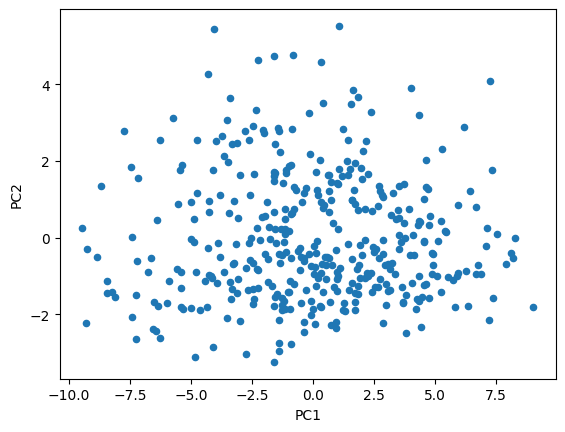

In [37]:
projected_df.plot(kind='scatter', x='PC1', y='PC2')

Adding colors to the scatter plot might give you some additional insights:

/tmp/ipython-input-1006275709.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_df.plot(kind='scatter', x='PC1', y='PC2', color=df.G_agg, colormap='cool')


<Axes: xlabel='PC1', ylabel='PC2'>

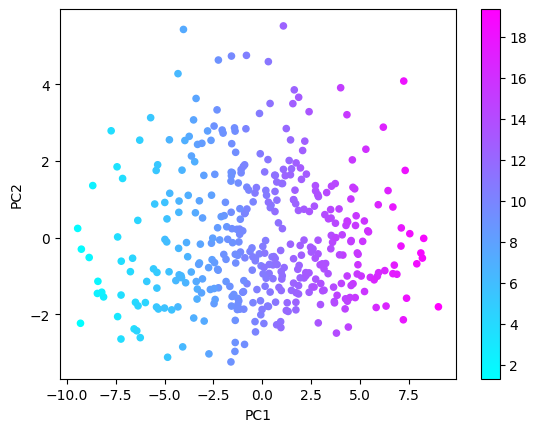

In [38]:
projected_df.plot(kind='scatter', x='PC1', y='PC2', color=df.G_agg, colormap='cool')

/tmp/ipython-input-222300723.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_df.plot(kind='scatter', x='PC1', y='PC2', color=df.Walc, colormap='cool')


<Axes: xlabel='PC1', ylabel='PC2'>

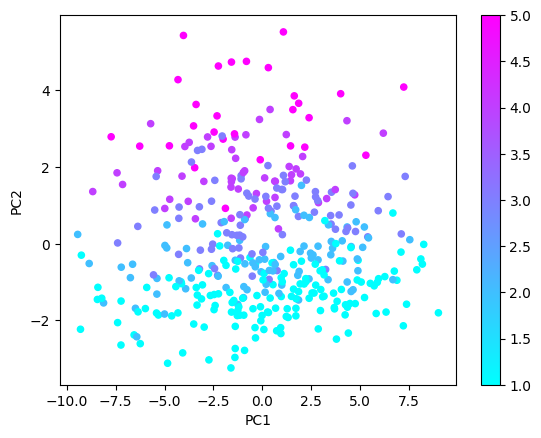

In [39]:
projected_df.plot(kind='scatter', x='PC1', y='PC2', color=df.Walc, colormap='cool')

Here, without getting into too much of details, one thing to note is that the principal components are actually a linear combination (i.e. weighted sum) of attributes. The contribution of attributes to each principal component can be measured by looking at the coefficients:

<Axes: >

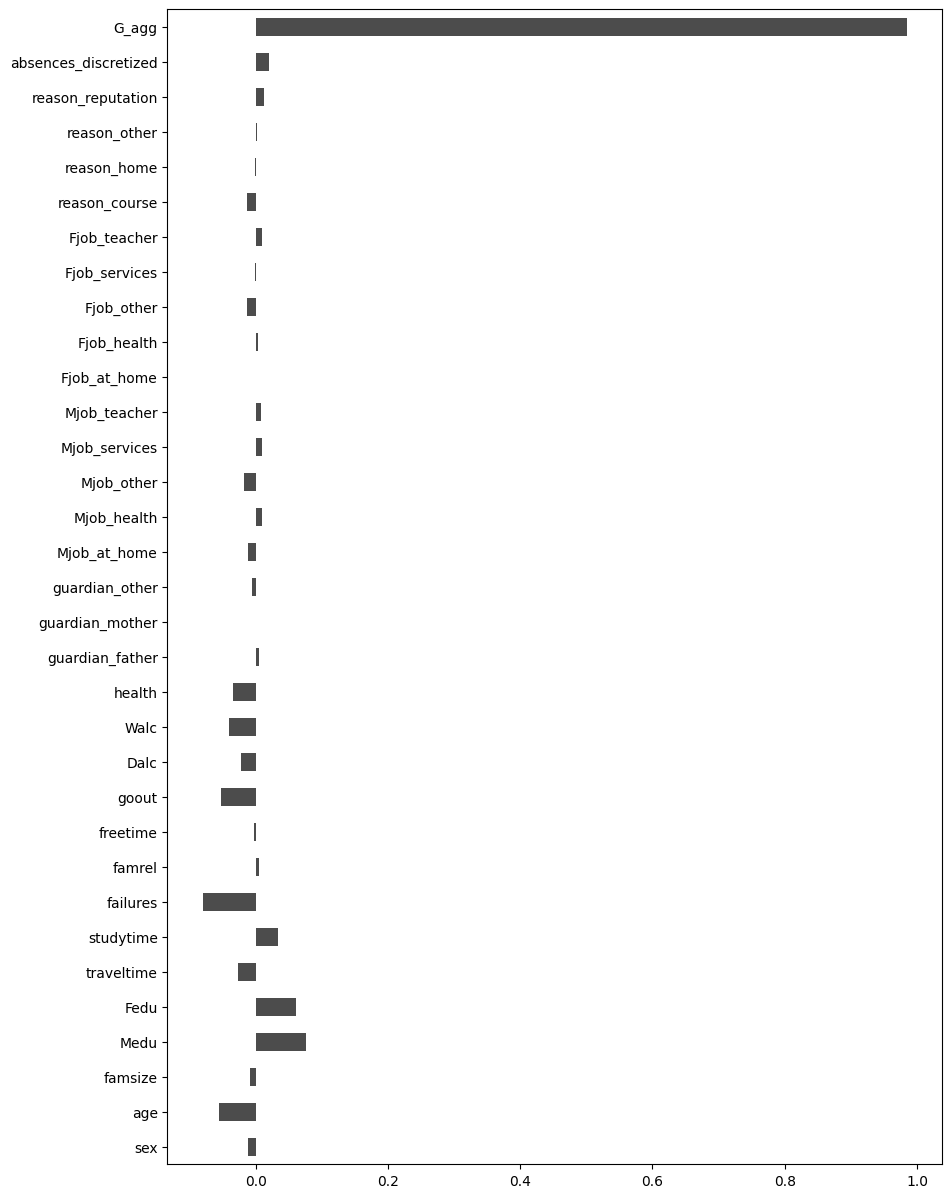

In [40]:
attrib = list(df.columns)         # get attribute names
pcdata  = pd.Series(pca_model.components_[0], index=attrib)  # zero-th principal component
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

<Axes: >

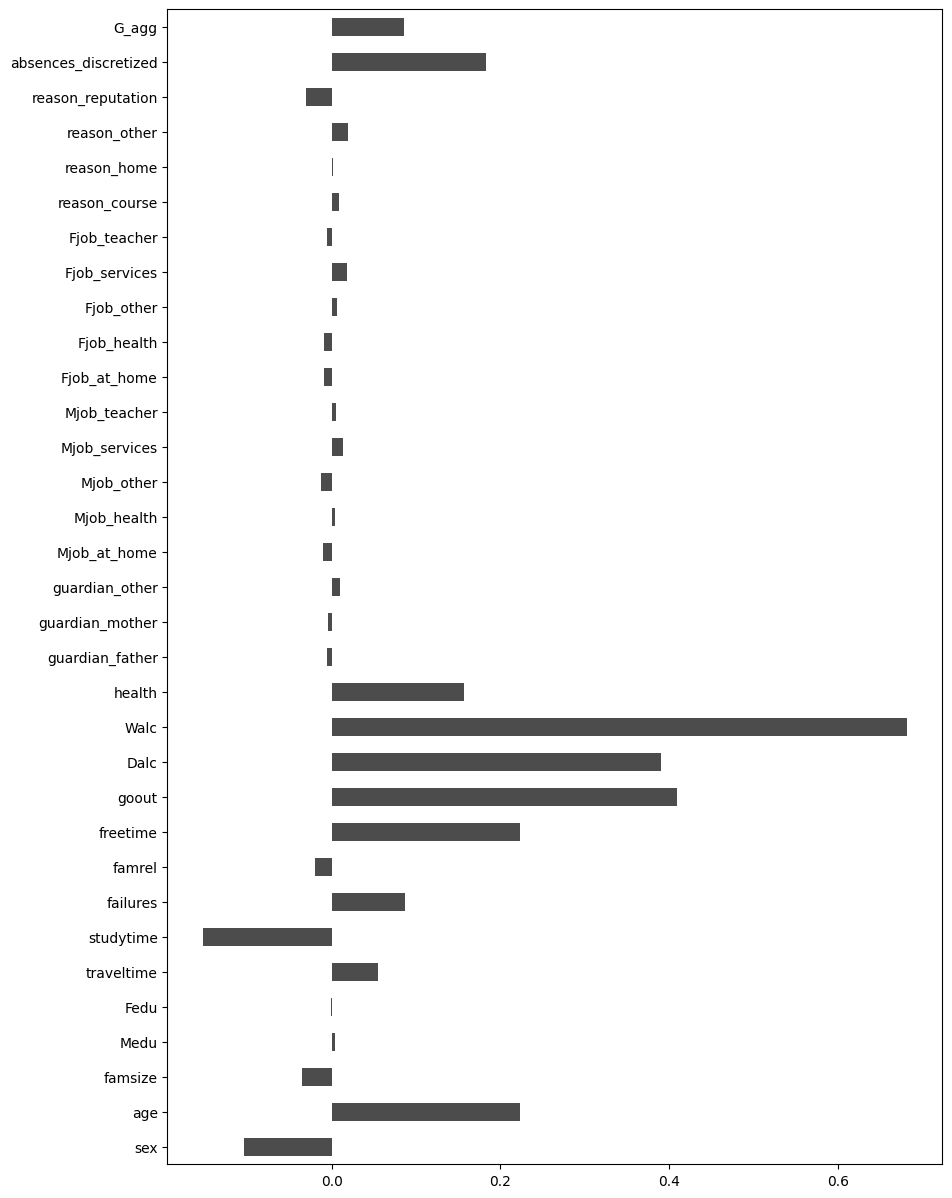

In [41]:
pcdata  = pd.Series(pca_model.components_[1], index=attrib)
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

#### Discussion (Assignment)
- How would you interpret the above visualizations?
- What are the variables that are most correlated with a student's performance?
- What are the variables that are most correlated with student alcohol consumption?

(provide your answers here)

 Visualization Interpretation (PCO)
*   Main Theme: Academic Performance
*   Dominant Factor: G_agg (High Positive)
*   Positive Loadings/Correlation: Medu, Fedu, studytime
*   Negative Loadings: Failures, age, goout


 Visualization Interpretation (PC1)
*   Main Theme: Social/Lifestyle Risk
*   Dominant Factor: Walc & Dalc (High positive)
*   Positive Loadings/Correlation: Walc, goout, Dalc, freetime
*   Negative Loadings: Failures, studytime, sex











Similar to PCA, there are other methods called Multidimensional Scaling, and t-SNE. Again, we are not to go into the details this time, but rather, will postpone the technical discussion to a later point in this semester. For now, let's just develop a quick intuitive understanding that MDS is simply a dimensionality reduction algorithm that tries to preserve distances among data points before and after projection and that t-SNE is just a non-linear version of MDS.

Like PCA, they are also available in Sklearn, but this time, under `manifold` module:

In [42]:
from sklearn.manifold import MDS, TSNE

Other than the difference in module name, the usage is pretty similar to PCA.

In [43]:
projected_mds = MDS(n_components=2).fit_transform(df)
projected_mds = pd.DataFrame(projected_mds, columns=['MDS1', 'MDS2'])
projected_mds.head(5)

,MDS1,MDS2
0,3.832983,-4.911497
1,4.768510,-4.426624
2,4.557738,-0.431225
3,-5.860233,0.095805
4,1.155014,-2.329568


<Axes: xlabel='MDS1', ylabel='MDS2'>

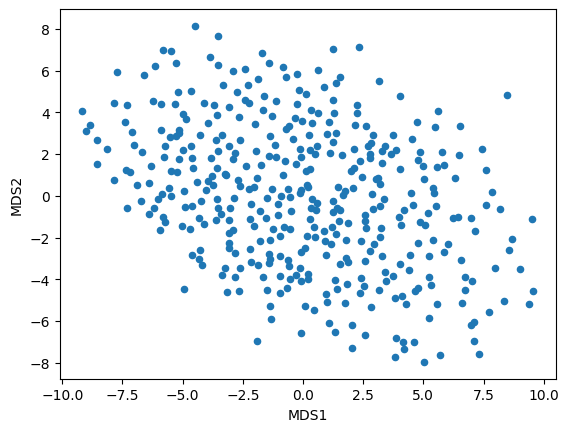

In [44]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2')

/tmp/ipython-input-509854541.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.G_agg, colormap='cool')


<Axes: xlabel='MDS1', ylabel='MDS2'>

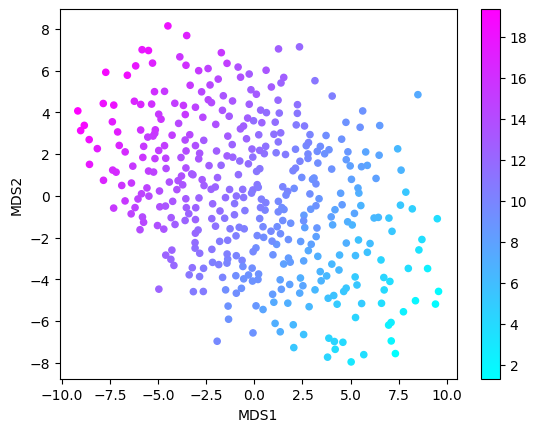

In [45]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.G_agg, colormap='cool')

/tmp/ipython-input-1010661932.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.Walc, colormap='cool')


<Axes: xlabel='MDS1', ylabel='MDS2'>

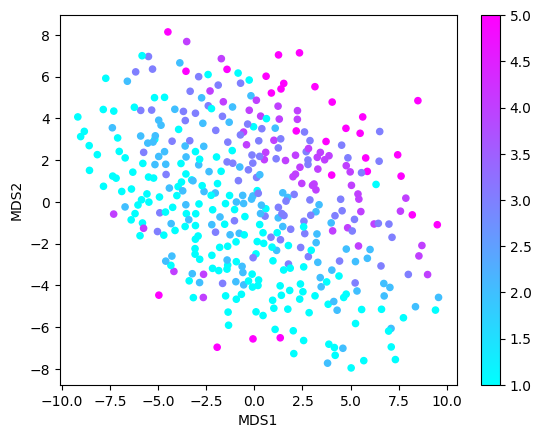

In [46]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.Walc, colormap='cool')

Also, the same with t-SNE:

In [47]:
projected_tsne = TSNE(n_components=2).fit_transform(df)
projected_tsne = pd.DataFrame(projected_tsne, columns=['TSNE1', 'TSNE2'])
projected_tsne.head(5)

,TSNE1,TSNE2
0,-14.753711,-3.142249
1,-18.685549,-6.494660
2,-11.048199,-9.864408
3,16.934151,-0.239012
4,-5.296811,-2.831919


/tmp/ipython-input-64854159.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.G_agg, colormap='cool')


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

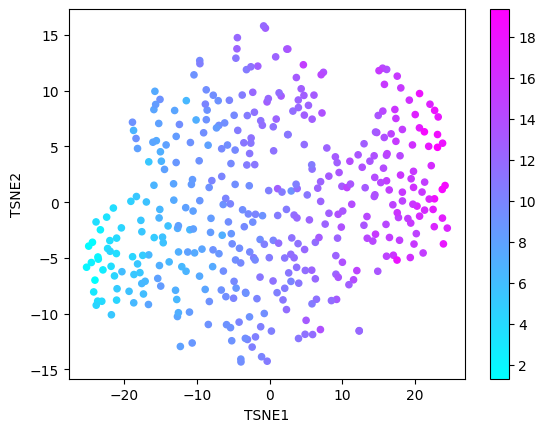

In [48]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.G_agg, colormap='cool')

/tmp/ipython-input-3186930342.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.Walc, colormap='cool')


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

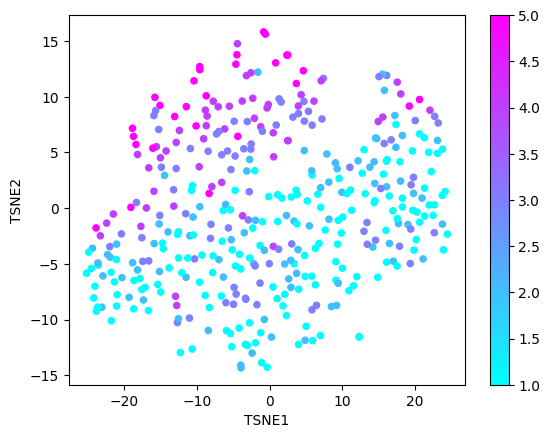

In [49]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.Walc, colormap='cool')

#### Discussion (Assignment)

- Visualize other variables than just `G_agg` and `Walc`.
- What kind of insight can you develop from the visualization? How would you interpret them?
- Why is it important to visualize things before to train/test any statistical model?

1. Visualizing Other Variables
Beyond G_agg (Academic) and Walc (Social), I recommend visualizing variables that showed high "loadings" in your PCA analysis to see if they form distinct clusters in t-SNE:

failures: This was a major negative driver in PC0. Visualizing this will show if students with past failures clump together in a specific "struggle zone" on the map.

Medu / Fedu: Since parental education was a positive driver, checking this might reveal if socio-economic background creates distinct structural clusters.

goout: To see if the "social" clusters identified in your PC1 analysis are geographically distinct from the "studious" clusters.

2. Developing Insights & Interpretation
When you look at your t-SNE plots, here is how you should interpret the visual patterns:

Cluster Density: If you see a tight "island" of points where almost everyone is colored "bright" (high G_agg), it suggests that those specific students share a very similar profile (e.g., high study time, low alcohol, high parental education).

Overlap/Mixing: If the colors are completely scrambled (e.g., high and low Walc are all mixed together), it means that social habits are widespread across all types of students and don't necessarily define a unique "sub-type" of student on their own.

Outliers: Points that are far away from any "island" are students with unique profiles—perhaps someone with very high study time but also very high failures.


3. Why Visualize Before Modeling?
Visualizing your data via PCA, MDS, or t-SNE before training a model (like a Regressor or Classifier) is crucial for several reasons:

Detecting Non-Linearity: If t-SNE shows clear clusters that PCA missed, you know your data has non-linear relationships. This tells you that a simple Linear Regression might perform poorly, and you should consider models like Random Forests or Neural Networks.

Feature Engineering: If you see two variables (like Medu and Fedu) always overlapping in their effect on clusters, you might decide to combine them into a single "Parental Education" feature to simplify the model.

Identifying Class Imbalance: You might notice that "High Performers" are a tiny island compared to a massive sea of "Average Performers." This warns you that your model might become biased toward the majority group.

Sanity Check: It confirms if your "target" (like G_agg) actually has any relationship with your "features." If every visualization looks like a random cloud of noise regardless of the color-coding, no statistical model will magically find a strong signal.

< [Data Mining](../ica03/Data_Mining.ipynb) | Contents (TODO) | [Supervised Learning](../ica05/Supervised_Learning.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica04/Data_Preprocessing_and_Visualization.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>